In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
kg=pd.read_csv('glass.csv')

In [3]:
kg

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
kg.shape

(214, 10)

In [5]:
kg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
kg.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [7]:
kg['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

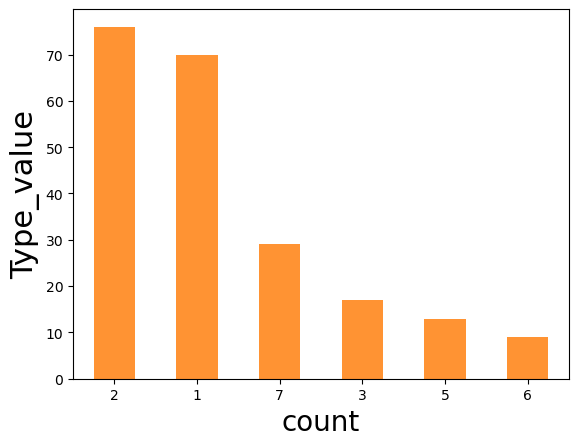

In [8]:
kg.Type.value_counts().plot(kind='bar',color='#ff9333')
plt.xlabel("count",size=20)
plt.ylabel("Type_value",size=22)
plt.xticks(rotation='0')
plt.show()

<AxesSubplot:ylabel='Type'>

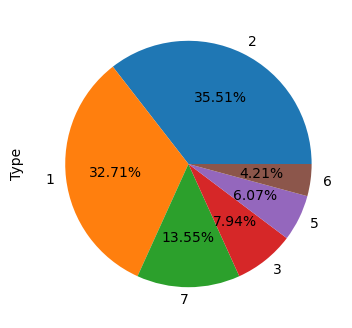

In [9]:
plt.figure(figsize=(10,4))
kg["Type"].value_counts().plot(kind='pie',autopct="%1.2f%%")

In [10]:
kg.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

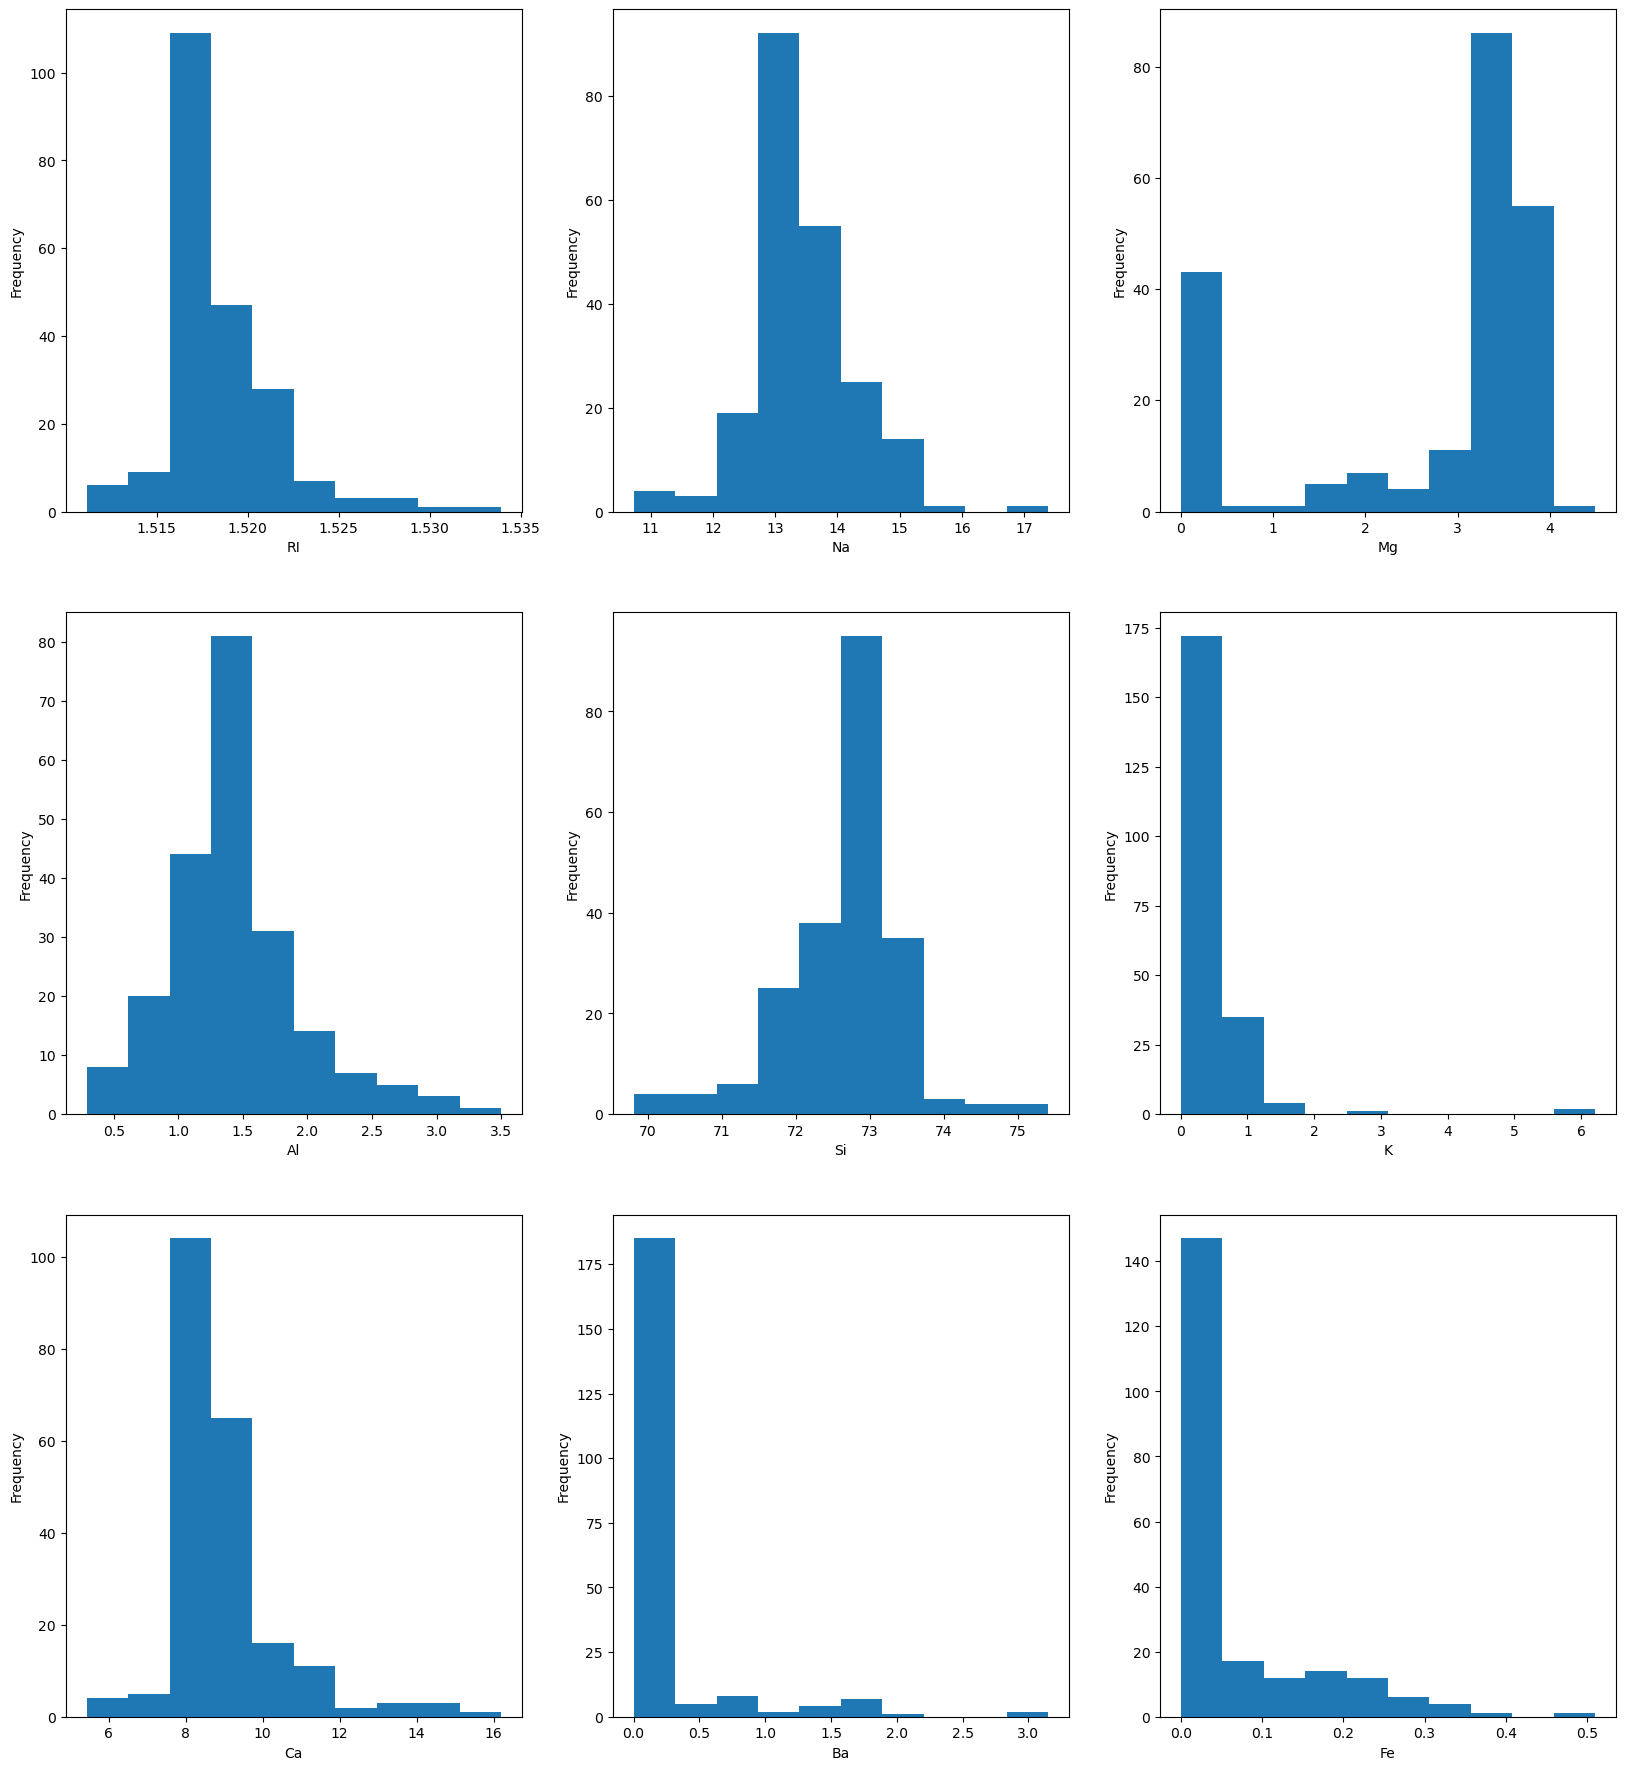

In [11]:
column=['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
fig=plt.figure(figsize=(20,30))
i=0
for column in column:
    sub=fig.add_subplot(4,3,i+1)
    sub.set_xlabel(column)
    kg[column].plot(kind='hist')
    i=i+1

In [12]:
array=kg.values
x=array[:,0:-1]
y=array[:,-1]

In [13]:
x=(x-x.min(axis=0))/(x.max(axis=0)-x.min(axis=0))
x

array([[0.43283582, 0.43759398, 1.        , ..., 0.30855019, 0.        ,
        0.        ],
       [0.28358209, 0.47518797, 0.80178174, ..., 0.22304833, 0.        ,
        0.        ],
       [0.22080773, 0.42105263, 0.79064588, ..., 0.21840149, 0.        ,
        0.        ],
       ...,
       [0.41703248, 0.54586466, 0.        , ..., 0.27973978, 0.52063492,
        0.        ],
       [0.23529412, 0.54887218, 0.        , ..., 0.28345725, 0.4984127 ,
        0.        ],
       [0.26163301, 0.52631579, 0.        , ..., 0.2964684 , 0.53015873,
        0.        ]])

In [14]:
y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 6., 6., 6., 6., 6., 6., 6., 6., 6., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 7., 7., 7.])

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=19,shuffle=True)

In [16]:
model=KNeighborsClassifier(n_neighbors=14)
model.fit(x_train,y_train)
pred=model.predict(x_test)
accuracy_score(y_test,pred)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         1.0       0.58      0.90      0.71        20
         2.0       0.71      0.68      0.70        22
         3.0       0.00      0.00      0.00         4
         5.0       0.00      0.00      0.00         7
         6.0       0.00      0.00      0.00         4
         7.0       0.67      1.00      0.80         8

    accuracy                           0.63        65
   macro avg       0.33      0.43      0.37        65
weighted avg       0.50      0.63      0.55        65



In [17]:
 n_neighbors=[2*i+1 for i in range(0,26)]
for n in n_neighbors:
    model=KNeighborsClassifier(n_neighbors=n)
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    accuracy_score(y_test,pred)
    
    print(classification_report(y_test,pred),n)

              precision    recall  f1-score   support

         1.0       0.63      0.85      0.72        20
         2.0       0.71      0.55      0.62        22
         3.0       0.00      0.00      0.00         4
         5.0       0.71      0.71      0.71         7
         6.0       1.00      0.75      0.86         4
         7.0       0.89      1.00      0.94         8

    accuracy                           0.69        65
   macro avg       0.66      0.64      0.64        65
weighted avg       0.68      0.69      0.68        65
 1
              precision    recall  f1-score   support

         1.0       0.60      0.90      0.72        20
         2.0       0.72      0.59      0.65        22
         3.0       0.00      0.00      0.00         4
         5.0       0.60      0.43      0.50         7
         6.0       1.00      0.50      0.67         4
         7.0       0.89      1.00      0.94         8

    accuracy                           0.68        65
   macro avg       0.

# VISUALISING THE CV RESULTS

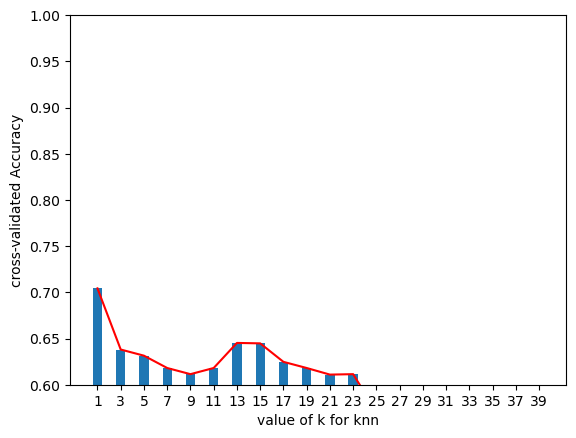

In [18]:
k_range=[2*i+1 for i in range(0,20)]
k_scores=[]

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,x_train,y_train,cv=10)
    k_scores.append(scores.mean())
    
plt.bar(k_range,k_scores)
plt.plot(k_range,k_scores,color='red')

plt.xlabel('value of k for knn')
plt.ylabel('cross-validated Accuracy')
plt.xticks(k_range)
plt.ylim(0.6,1)
plt.show()

In [19]:
model=model = KNeighborsClassifier(n_neighbors=1)
model.fit(x_train,y_train)
pred=model.predict(x_test)
accuracy_score(y_test,pred)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         1.0       0.63      0.85      0.72        20
         2.0       0.71      0.55      0.62        22
         3.0       0.00      0.00      0.00         4
         5.0       0.71      0.71      0.71         7
         6.0       1.00      0.75      0.86         4
         7.0       0.89      1.00      0.94         8

    accuracy                           0.69        65
   macro avg       0.66      0.64      0.64        65
weighted avg       0.68      0.69      0.68        65

